<a href="https://colab.research.google.com/gist/T19-arch/05127c462f17b82f8e402eb30c9d7f3e/polymer-predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
Este es un modelo de regresión utilizando Deep Learning mediante el cual se lleva a cabo un proceso de Machine Learning. 
El modelo se integra por redes neuronales y busca predecir la temperatura de transición vitrea (Tg) de dos polímeros, uno hecho con unidades de Isopropileno y otro con Ácido Láctico.
En este proyecto se integraron muchos conocimientos adquiridos durante las sesiones del club 2: Learning Machín de Polímeros. 
Agrademos a nuestros profesores del club María Ley Flores Y Javier Carrillo.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

# Cargar datos

In [ ]:
datos = pd.read_csv('base_polimeros.csv')

FileNotFoundError: ignored

In [ ]:
datos

,Nomenclature,SMILES,Tg,mol,Peso Molecular,EValencia,Rotables,TPSA,CParcial,EEmax,EEmin,AAromaticos
0,Poly(4-biphenyl acrylate),C=CC(=O)Oc2ccc(c1ccccc1)cc2,383,<rdkit.Chem.rdchem.Mol object at 0x000001C2DCE...,224.259,84,3,26.3,0.423390,11.743743,-1.540408,2
1,Poly(butyl acrylate),CCCCOC(=O)C=C,219,<rdkit.Chem.rdchem.Mol object at 0x000001C2DCE...,128.171,52,5,26.3,0.462546,11.246086,-3.786302,0
2,Poly(sec-butyl acrylate),CC(OC(=O)C=C)CC,250,<rdkit.Chem.rdchem.Mol object at 0x000001C2DCE...,128.171,52,5,26.3,0.459541,11.392472,-3.843171,0
3,Poly(2-tertbutylphenyl acrylate),C=CC(=O)Oc1ccccc1C(C)(C)C,345,<rdkit.Chem.rdchem.Mol object at 0x000001C2DCE...,204.269,80,2,26.3,0.423071,12.059739,-3.934860,1
4,Poly(4-tertbutylphenyl acrylate),C=CC(=O)Oc1ccc(C(C)(C)C)cc1,344,<rdkit.Chem.rdchem.Mol object at 0x000001C2DCE...,204.269,80,2,26.3,0.423390,11.773838,-3.852581,1
...,...,...,...,...,...,...,...,...,...,...,...,...
346,Poly(4-chlorostyrene),C=Cc1ccc(cc1)Cl,398,<rdkit.Chem.rdchem.Mol object at 0x000001C2DDE...,138.597,46,1,0.0,0.098470,7.501296,-0.872109,1
347,Poly(2-chlorostyrene),C=Cc1ccccc1Cl,395,<rdkit.Chem.rdchem.Mol object at 0x000001C2DDE...,138.597,46,1,0.0,0.098417,7.501296,-0.854694,1
348,Poly(4-bromostyrene),C=Cc1ccc(cc1)Br,411,<rdkit.Chem.rdchem.Mol object at 0x000001C2DDE...,183.048,46,1,0.0,0.098470,7.555741,-0.844331,1
349,Poly(vinyl chloride),ClC=C,350,<rdkit.Chem.rdchem.Mol object at 0x000001C2DDE...,62.499,18,0,0.0,0.093598,6.302469,-0.641975,0


In [ ]:
#datos_M contiene los 8 input, 
datos_M = datos[['Peso Molecular','EValencia','Rotables', 'TPSA', 'CParcial', 'EEmax', 'EEmin', 'AAromaticos', 'Tg']] 

In [ ]:
datos_M

,Peso Molecular,EValencia,Rotables,TPSA,CParcial,EEmax,EEmin,AAromaticos,Tg
0,224.259,84,3,26.3,0.423390,11.743743,-1.540408,2,383
1,128.171,52,5,26.3,0.462546,11.246086,-3.786302,0,219
2,128.171,52,5,26.3,0.459541,11.392472,-3.843171,0,250
3,204.269,80,2,26.3,0.423071,12.059739,-3.934860,1,345
4,204.269,80,2,26.3,0.423390,11.773838,-3.852581,1,344
...,...,...,...,...,...,...,...,...,...
346,138.597,46,1,0.0,0.098470,7.501296,-0.872109,1,398
347,138.597,46,1,0.0,0.098417,7.501296,-0.854694,1,395
348,183.048,46,1,0.0,0.098470,7.555741,-0.844331,1,411
349,62.499,18,0,0.0,0.093598,6.302469,-0.641975,0,350


# De Dataframe a Array

In [ ]:
# Guardamos los valores de nuestra tablita en la variable dataset
valores = datos_M.values

In [ ]:
valores

array([[224.259     ,  84.        ,   3.        , ...,  -1.54040829,
          2.        , 383.        ],
       [128.171     ,  52.        ,   5.        , ...,  -3.78630196,
          0.        , 219.        ],
       [128.171     ,  52.        ,   5.        , ...,  -3.8431713 ,
          0.        , 250.        ],
       ...,
       [183.048     ,  46.        ,   1.        , ...,  -0.84433107,
          1.        , 411.        ],
       [ 62.499     ,  18.        ,   0.        , ...,  -0.64197531,
          0.        , 350.        ],
       [ 96.944     ,  24.        ,   0.        , ...,  -0.54320988,
          0.        , 270.        ]])

In [ ]:
type(valores)

numpy.ndarray

In [ ]:
valores.shape

(351, 9)

In [ ]:
x = valores[:, 0:8]
y = valores[:,8]

In [ ]:
y = np.reshape(y, (-1,1))

In [ ]:
x.shape, y.shape

((351, 8), (351, 1))

# Datos escalados 

In [ ]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [ ]:
# Escalar/Normalizar los datos de las x
print(scaler_x.fit(x))
xscale = scaler_x.transform(x)

# Escalar/Normalizar los datos de las y
print(scaler_y.fit(y))
yscale = scaler_y.transform(y)

MinMaxScaler()
MinMaxScaler()


In [ ]:
x

array([[224.259     ,  84.        ,   3.        , ...,  11.74374286,
         -1.54040829,   2.        ],
       [128.171     ,  52.        ,   5.        , ...,  11.24608607,
         -3.78630196,   0.        ],
       [128.171     ,  52.        ,   5.        , ...,  11.39247213,
         -3.8431713 ,   0.        ],
       ...,
       [183.048     ,  46.        ,   1.        , ...,   7.55574074,
         -0.84433107,   1.        ],
       [ 62.499     ,  18.        ,   0.        , ...,   6.30246914,
         -0.64197531,   0.        ],
       [ 96.944     ,  24.        ,   0.        , ...,   6.31481482,
         -0.54320988,   0.        ]])

In [ ]:
xscale

array([[0.3851779 , 0.41860465, 0.11111111, ..., 0.73691639, 0.81648005,
        0.5       ],
       [0.1965437 , 0.23255814, 0.18518519, ..., 0.67071984, 0.53678471,
        0.        ],
       [0.1965437 , 0.23255814, 0.18518519, ..., 0.6901916 , 0.52970241,
        0.        ],
       ...,
       [0.30427493, 0.19767442, 0.03703704, ..., 0.17984318, 0.90316695,
        0.25      ],
       [0.06762036, 0.03488372, 0.        , ..., 0.01313743, 0.92836759,
        0.        ],
       [0.13524072, 0.06976744, 0.        , ..., 0.01477961, 0.94066747,
        0.        ]])

# Entrenar modelo 

# Datos 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

# Características del modelo

*8 variables de entrada

*2 capas ocultas de 12 y 8 neuronas

*1 capa de salida 

*MSE y MAE son nustras funciones de pérdida

In [ ]:
model = Sequential()

model.add(Dense(12, input_dim = 8, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000211B8BDB9D0>>

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics = ['mse','mae'])

# Entrenando modelo

In [ ]:
history = model.fit(X_train, y_train, epochs = 150, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/150
5/5 [==============================] - 1s 80ms/step - loss: 0.1302 - mse: 0.1302 - mae: 0.3056 - val_loss: 0.0939 - val_mse: 0.0939 - val_mae: 0.2575
Epoch 2/150
5/5 [==============================] - 0s 11ms/step - loss: 0.1038 - mse: 0.1038 - mae: 0.2632 - val_loss: 0.0731 - val_mse: 0.0731 - val_mae: 0.2221
Epoch 3/150
5/5 [==============================] - 0s 11ms/step - loss: 0.0821 - mse: 0.0821 - mae: 0.2308 - val_loss: 0.0567 - val_mse: 0.0567 - val_mae: 0.1962
Epoch 4/150
5/5 [==============================] - 0s 10ms/step - loss: 0.0643 - mse: 0.0643 - mae: 0.2039 - val_loss: 0.0433 - val_mse: 0.0433 - val_mae: 0.1744
Epoch 5/150
5/5 [==============================] - 0s 11ms/step - loss: 0.0501 - mse: 0.0501 - mae: 0.1824 - val_loss: 0.0331 - val_mse: 0.0331 - val_mae: 0.1571
Epoch 6/150
5/5 [==============================] - 0s 9ms/step - loss: 0.0391 - mse: 0.0391 - mae: 0.1654 - val_loss: 0.0282 - val_mse: 0.0282 - val_mae: 0.1446
Epoch 7/150
5/5 [============

In [ ]:
#Precisión del modelo

Text(0.5, 0, 'Predicted')

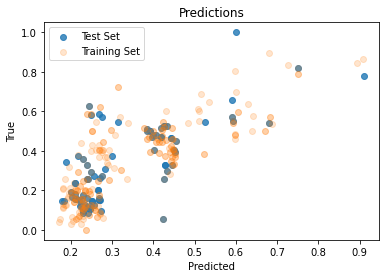

In [ ]:
plt.scatter(y_pred_test, y_test, alpha = 0.8, label = 'Test Set')
plt.scatter(y_pred_train, y_train, alpha = 0.2, label = 'Training Set')
plt.legend()

plt.title('Predictions')
plt.ylabel('True')
plt.xlabel('Predicted')

# POLÍMEROS A PARTIR DE ISOBUTILENO Y ÁCIDO LÁCTICO

In [ ]:
import numpy as np
import pandas as pd
import rdkit

In [ ]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors

In [ ]:
from rdkit.ML.Descriptors import MoleculeDescriptors
import matplotlib.pyplot as plt

In [ ]:
from mordred import Calculator

# Buscar inputs para poder predecir el Tg del Isobutileno y el Ácido Láctico 

In [ ]:
random = pd.read_csv('Moleculas.csv')

NameError: ignored

In [ ]:
random

NameError: ignored

In [ ]:
random['mol'] = random['SMILES'].map(Chem.MolFromSmiles).map(Chem.AddHs)

In [ ]:
random['Peso Molecular'] = random['mol'].map(Descriptors.MolWt)
random['EValencia'] =  random['mol'].map(Descriptors.NumValenceElectrons)
random['Rotables'] = random['mol'].map(Descriptors.NumRotatableBonds)
random['TPSA'] = random['mol'].map(Descriptors.TPSA)
random['CParcial'] = random['mol'].map(Descriptors.MaxAbsPartialCharge)
random['EEmax'] = random['mol'].map(Descriptors.MaxEStateIndex)
random['EEmin'] = random['mol'].map(Descriptors.MinEStateIndex)
random['AAromaticos'] = random['mol'].map(Descriptors.NumAromaticRings)

In [ ]:
random

In [ ]:
random_O = random[['Nombre', 'Peso Molecular', 'EValencia', 'Rotables', 'TPSA', 'CParcial', 'EEmax', 'EEmin', 'AAromaticos']]
# random_O muestra los datos de forma ordenada, similar a la de datos_M

In [ ]:
random_O

In [ ]:
random.to_csv('base_ramdom.csv') #Guardamos base nueva para poder usarla en otra ocasión 

# Predecir Tg del Isobutileno

In [ ]:
Xnew = np.array([[56.108, 24, 2, 0.00, 0.100420, 6.750579, -2.884838, 0]])
Xnew = scaler_x.transform(Xnew)
ynew = model.predict(Xnew)

#invert normalize
ynew = scaler_y.inverse_transform(ynew)
Xnew = scaler_x.inverse_transform(Xnew)

print('X=%s, Predicted=%s' %(Xnew[0], ynew[0]))

NameError: ignored

# Predecir Tg del ácido láctico 

In [ ]:
Xnew = np.array([[90.078, 36, 3, 57.53, 0.479336, 10.509236,  -3.159838, 0]])
Xnew = scaler_x.transform(Xnew)
ynew = model.predict(Xnew)

#invert normalize
ynew = scaler_y.inverse_transform(ynew)
Xnew = scaler_x.inverse_transform(Xnew)

print('X=%s, Predicted=%s' %(Xnew[0], ynew[0]))

NameError: ignored

In [ ]:
# Predicted = Tg (Temperatura de trancisión vítrea)